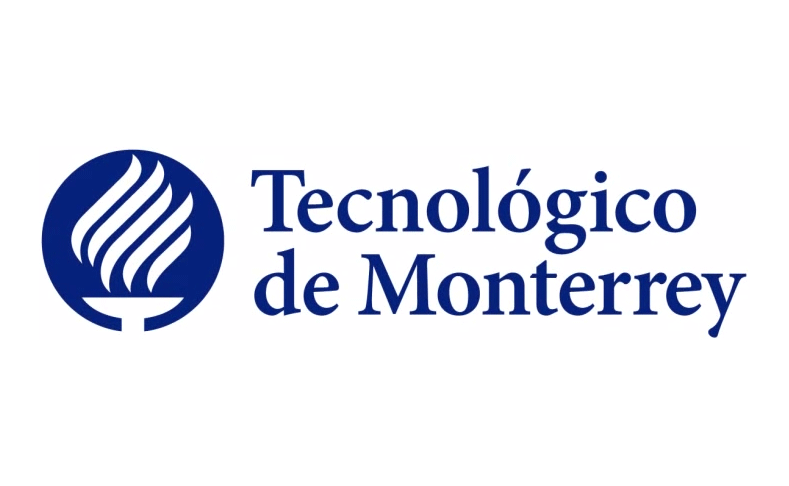

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseñor

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  


#**Carga de librerías y visualización inicial del DataFrame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MNA/Proyecto Integrador TC5035.10/Semana 3/NMP Proyecto integrador/ventas.csv', encoding='iso-8859-1', low_memory=False)

In [ ]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN


In [ ]:
#Imprimir número de columnas y número de filas del dataframe
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 1048575
Número de columnas: 64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 64 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SUCURSAL                   1048533 non-null  object 
 1   ESTADO_SUCURSAL            1048538 non-null  object 
 2   CLAVE_OPERACION            1048516 non-null  object 
 3   OPERACION                  1048511 non-null  object 
 4   PARTIDA                    1048516 non-null  object 
 5   ORIGEN                     1048516 non-null  object 
 6   DESCRIPCION_PARTIDA        1048436 non-null  object 
 7   GRAMAJE                    941340 non-null   object 
 8   KILATAJE                   866459 non-null   object 
 9   AVALUO_COMPLEMENTARIO      915717 non-null   object 
 10  FACTOR_HECHURA             941352 non-null   object 
 11  FACTOR                     941343 non-null   object 
 12  VALOR_MONTE                1048243 non-null  object 
 13  VALOR_MONTE_

**Interpretaciones**

Revisando a detalle los datos, identificamos que hay columnas que no contienen información, estas son las siguientes: AVALUO_COMPLEMENTARIO, GASTOSOPERACION, IVAINTERESDEPOSITO, IVAINTERESALMONEDA, IVAGASTOSOPERACION, IVA_DESEXT, FECHA_EMPENO_OK, FECHA_HORA_MOV_OK, FECHA_COMERCIALIZACION_OK, CUSTODIA, COM_ALMACENAJE, IVACOM_ALMACENAJE, COMPASE_COMERCIALIZACION, IVACOM_PASECOM, IVACOM_EXHIBICION, INTERES_DEPRECUP, IVAINT_DEPRECUP, imp_minusvalia, imp_cancelacion_int. Las cuales vamos a eliminar del dataset con la función drop de pandas

In [ ]:
df.drop(['AVALUO_COMPLEMENTARIO','GASTOSOPERACION', 'IVAINTERESDEPOSITO', 'IVAINTERESALMONEDA', 'IVAGASTOSOPERACION', 'IVA_DESEXT',
              'FECHA_EMPENO_OK', 'FECHA_HORA_MOV_OK', 'FECHA_COMERCIALIZACION_OK', 'CUSTODIA', 'COM_ALMACENAJE',
              'IVACOM_ALMACENAJE', 'COMPASE_COMERCIALIZACION', 'IVACOM_PASECOM', 'IVACOM_EXHIBICION',
              'INTERES_DEPRECUP', 'IVAINT_DEPRECUP', 'imp_minusvalia', 'imp_cancelacion_int'], axis=1,inplace=True)


In [ ]:
df.head(5)

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,FACTOR_HECHURA,...,DIAS_ALMONEDA,RANGO_DIAS_ALMONEDA,PRECIO_VENTA_FINAL_SID,TIPO_PRENDA,FCH_CARGA,SALDO_INSOLUTO,COM_EXHIBICION,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,Abollado Ligero / Funcional,...,31,31-60,1309.42,anillo,03/05/2024,1309.42,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,31,31-60,741.19,anillo,03/05/2024,741.19,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,31,31-60,1601.76,churumbela,03/05/2024,1601.76,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,Buen Estado Sin Personalizar / Sin Abollar,...,29,dic-30,0.47,collar,03/05/2024,0.47,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,Personalizado,...,21,dic-30,0.47,otros,03/05/2024,0.47,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0


In [ ]:
print('Número de filas:', df.shape[0])                                             #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df.shape[1])

Número de filas: 1048575
Número de columnas: 45


Adicional, encontramos instancias que no tienen valores (NaN) dentro del dataset, por lo que también eliminamos las instancias que tienen al menos 5 valores no nulos

In [ ]:
df = df.dropna(thresh=5)                                                          # Mantiene filas con al menos 10 valores no nulos


In [ ]:
print('Número de filas:', df.shape[0])                                            #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de columnas:', df.shape[1])

Número de filas: 1048548
Número de columnas: 45


Vemos que se redujeron el número de columnas y el número de filas en 18 y 25 respectivamente

#**Valores Faltantes**

In [ ]:
df.isnull().sum()*100/len(df)

,0
SUCURSAL,0.002956
ESTADO_SUCURSAL,0.002098
CLAVE_OPERACION,0.003624
OPERACION,0.003719
PARTIDA,0.003529
ORIGEN,0.003433
DESCRIPCION_PARTIDA,0.011063
GRAMAJE,10.224615
KILATAJE,17.365919
FACTOR_HECHURA,10.223566


**Interpretaciones**

Posterior a la eliminación de columnas y filas, todavía podemos observar que las columnas COM_EXHIBICION y FECHA_MAX_DEP_RECUP tienen el 71% y 36% de valores faltantes, por lo que procedemos a eliminar las columnas. Adicional, la columna num_particion se deriva de la columna FECHA_CARGA por lo que también se procede a eliminar.

In [ ]:
df.drop(['COM_EXHIBICION','FECHA_MAX_DEP_RECUP','num_particion'], axis=1,inplace=True)

In [ ]:
                                                                                  #Imprimir número de columnas y número de filas del dataframe posterior a esta primer limpieza
print('Número de filas:', df.shape[0])
print('Número de columnas:', df.shape[1])

Número de filas: 1048548
Número de columnas: 42


In [ ]:
df.isnull().sum()*100/len(df)

,0
SUCURSAL,0.002956
ESTADO_SUCURSAL,0.002098
CLAVE_OPERACION,0.003624
OPERACION,0.003719
PARTIDA,0.003529
ORIGEN,0.003433
DESCRIPCION_PARTIDA,0.011063
GRAMAJE,10.224615
KILATAJE,17.365919
FACTOR_HECHURA,10.223566


Vamos a revisar ahora las columnas con el porcentaje de valores faltantes

In [ ]:
per_miss_col = df.isna().mean() * 100
missing = pd.DataFrame(per_miss_col)
missing.columns = ['Percentage of missing values (%)']
missing

,Percentage of missing values (%)
SUCURSAL,0.002956
ESTADO_SUCURSAL,0.002098
CLAVE_OPERACION,0.003624
OPERACION,0.003719
PARTIDA,0.003529
ORIGEN,0.003433
DESCRIPCION_PARTIDA,0.011063
GRAMAJE,10.224615
KILATAJE,17.365919
FACTOR_HECHURA,10.223566


#**Asignación de tipo de dato a cada variable**

Un punto importante a destacar es que el tipo de dato de cada columna, está por default como "objeto", lo que haremos a continuación será asignar el tipo de datos que está de acuerdo con la naturaleza correcta de los datos y de acuerdo con el negocio

In [ ]:
                                                                                   #Diccionario con columnas y tipo de dato correcto
dicc = {
    'SUCURSAL': 'str',
    'ESTADO_SUCURSAL': 'str',
    'CLAVE_OPERACION': 'str',
    'OPERACION': 'str',
    'PARTIDA': 'str',
    'ORIGEN': 'str',
    'DESCRIPCION_PARTIDA': 'str',
    'GRAMAJE': 'float',
    'KILATAJE': 'str',
    'FACTOR_HECHURA': 'str',
    'FACTOR': 'str',
    'VALOR_MONTE': 'float',
    'VALOR_MONTE_ACTUALIZADO': 'float',
    'AVALUO_COMERCIAL': 'float',
    'PRESTAMO': 'float',
    'PRECIO_VENTA_INICIAL': 'float',
    'PRECIO_VENTA_FINAL': 'float',
    'FECHA_EMPENO': 'datetime',
    'FECHA_COMERCIALIZACION': 'datetime',
    'VALOR_ANCLA_ORO': 'float',
    'RAMO': 'str',
    'SUBRAMO': 'str',
    'REFRENDOS_REALIZADOS': 'float',
    'INCREMENTO': 'int',
    'DESPLAZAMIENTO_COMERCIAL': 'int',
    'VALUADOR': 'str',
    'FECHA_HORA_MOV': 'datetime',
    'DEMASIA':'float',
    'INTERES':'float',
    'INTERESALMONEDA':'float',
    'DES_EXT':'float',
    'IMPORTE_VENTA':'float',
    'PRODUCTO':'str',
    'TASA_OFERTA':'float',
    'CANAL':'str',
    'DIAS_ALMONEDA': 'float',
    'RANGO_DIAS_ALMONEDA': 'str',
    'PRECIO_VENTA_FINAL_SID': 'float',
    'TIPO_PRENDA': 'str',
    'FCH_CARGA': 'datetime',
    'SALDO_INSOLUTO': 'float',
    'FECHA_CARGA': 'datetime'
}

In [ ]:
                                                                                       #Convertir los tipos de datos
for col, tipo in dicc.items():
  if tipo in ['int', 'float']:                                                         # Manejar valores numericos
    try:
      df[col] = pd.to_numeric(df[col], errors='coerce')                                # Convertir a tipo numerico, invalid values become NaN
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")


  elif tipo == 'datetime':
    try:                                                                               # Manejar fechas
      df[col] = pd.to_datetime(df[col], errors='coerce')                               # Convert to datetime, invalid values become NaT
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")
  else:                                                                                # Manejar strings
    df[col] = df[col].astype(tipo)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048548 entries, 0 to 1048574
Data columns (total 42 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   SUCURSAL                  1048548 non-null  object             
 1   ESTADO_SUCURSAL           1048548 non-null  object             
 2   CLAVE_OPERACION           1048548 non-null  object             
 3   OPERACION                 1048548 non-null  object             
 4   PARTIDA                   1048548 non-null  object             
 5   ORIGEN                    1048548 non-null  object             
 6   DESCRIPCION_PARTIDA       1048548 non-null  object             
 7   GRAMAJE                   941302 non-null   float64            
 8   KILATAJE                  1048548 non-null  object             
 9   FACTOR_HECHURA            1048548 non-null  object             
 10  FACTOR                    1048548 non-null  object         

Vamos a revisar los valores únicos por columna

In [ ]:
df.nunique()

,0
SUCURSAL,445
ESTADO_SUCURSAL,154
CLAVE_OPERACION,110
OPERACION,100
PARTIDA,1036644
ORIGEN,107
DESCRIPCION_PARTIDA,934954
GRAMAJE,4407
KILATAJE,151
FACTOR_HECHURA,157


**Interpretaciones**

Podemos confirmar que las variables ahora ya cuentan con el tipo de dato correcto asignado y revisamos la cantidad de valores únicos por columna. Sin embargo, existen columnas con datos faltantes por lo que haremos una imputación a las variables numéricas y variables categóricas

#Imputación de datos perdidos o inexistentes

In [ ]:
numeric_feat =df.select_dtypes(include=['int64', 'float64']).columns            # seleccionamos las columnas con tipo de dato numérico
cat_var_feat = df.select_dtypes(include=['object']).columns                     # seleccionamos las columns con tipo de dato categórico

df[numeric_feat] = df[numeric_feat].apply(lambda x: x.fillna(x.median()))       # en las variables numéricas decidimos aplicar la imputación de mediana, ya que las distribuciones están sesgadas a la izquierda mayormente
df[cat_var_feat] = df[cat_var_feat].apply(lambda x: x.fillna(x.mode()[0]))      # decidimos aplicar imputación de moda a las variables categóricas

In [ ]:
df.isnull().sum()*100/len(df)

,0
SUCURSAL,0.000000
ESTADO_SUCURSAL,0.000000
CLAVE_OPERACION,0.000000
OPERACION,0.000000
PARTIDA,0.000000
ORIGEN,0.000000
DESCRIPCION_PARTIDA,0.000000
GRAMAJE,0.000000
KILATAJE,0.000000
FACTOR_HECHURA,0.000000


Interpretación. Podemos observar que los datos faltanates únicamente ya corresponden a las fechas, las cuales vamos a determinar más adelante el plan de acción con las mismas

#**Evaluación de correlaciones entre variables numéricas**

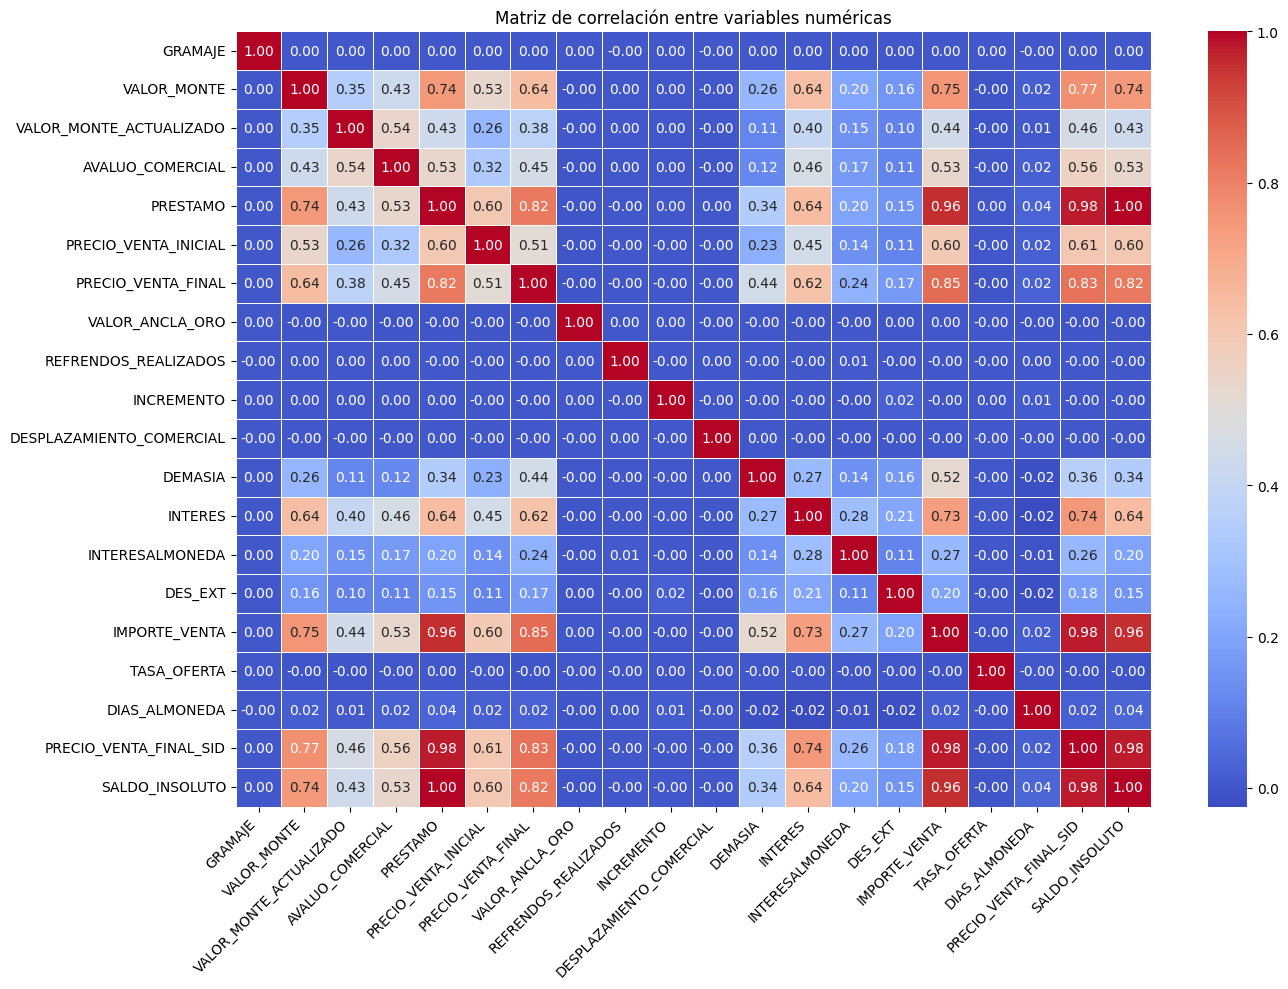

In [ ]:
df_numericas = df.select_dtypes(include=['number'])                                                                     # Selecciona solo las columnas numericas

correlation_matrix = df_numericas.corr()                                                                                # Calcula la matriz de correlación



plt.figure(figsize=(14, 10))                                                                                            # Ajusta tamaño según número de variables
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)                                 # Crea el mapa de calor
plt.title("Matriz de correlación entre variables numéricas")                                                            # Título
plt.xticks(rotation=45, ha='right')                                                                                     # Rotación de etiquetas
plt.yticks(rotation=0)                                                                                                  # Rotación de etiquetas
plt.tight_layout()                                                                                                      # Ajusta el espaciado
plt.show()

In [ ]:
df_numericas = df.select_dtypes(include=['number'])
corr = df_numericas.corr()                                                                                                    # Calcular la matriz de correlación

correlation_threshold = 0.8                                                                                                   # Umbral de correlación


positive_correlations = corr[corr > correlation_threshold].stack().reset_index()                                              # Extraer los pares de variables con correlaciones mayor al umbral
positive_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']                                                   # Renombrar las columnas del resultado
positive_correlations = positive_correlations[positive_correlations['Variable 1'] != positive_correlations['Variable 2']]     # Eliminar correlaciones redundatnes entre la misma variable

negative_correlations = corr[corr < -correlation_threshold].stack().reset_index()                                             # Extraer solo los pares de variables con correlacion menor que el umbral negativo
negative_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
negative_correlations = negative_correlations[negative_correlations['Variable 1'] != negative_correlations['Variable 2']]     # Eliminar autocorrelaciones

print("Correlaciones Positivas Fuertes (> 0.8):")                                                                             # Imprime las correlaciones positivas y negativas
print(positive_correlations.sort_values(by='Correlation', ascending=False))

print("\ Correlaciones Negativas Fuertes (< -0.8):")
print(negative_correlations.sort_values(by='Correlation', ascending=True))

Correlaciones Positivas Fuertes (> 0.7):
                Variable 1              Variable 2  Correlation
8                 PRESTAMO          SALDO_INSOLUTO     0.999938
35          SALDO_INSOLUTO                PRESTAMO     0.999938
26           IMPORTE_VENTA  PRECIO_VENTA_FINAL_SID     0.978961
32  PRECIO_VENTA_FINAL_SID           IMPORTE_VENTA     0.978961
34  PRECIO_VENTA_FINAL_SID          SALDO_INSOLUTO     0.978655
38          SALDO_INSOLUTO  PRECIO_VENTA_FINAL_SID     0.978655
7                 PRESTAMO  PRECIO_VENTA_FINAL_SID     0.978618
30  PRECIO_VENTA_FINAL_SID                PRESTAMO     0.978618
23           IMPORTE_VENTA                PRESTAMO     0.959437
6                 PRESTAMO           IMPORTE_VENTA     0.959437
37          SALDO_INSOLUTO           IMPORTE_VENTA     0.959403
27           IMPORTE_VENTA          SALDO_INSOLUTO     0.959403
24           IMPORTE_VENTA      PRECIO_VENTA_FINAL     0.846221
12      PRECIO_VENTA_FINAL           IMPORTE_VENTA     0.846221

#**Transformación de variables numéricas**

Nuestra variable de salida u objetivo se denomina DIAS_ALMONEDA, que son los días que transcurren entre que llega el artículo y la fecha de movimiento (venta). Vamos a observar su distribución

<Axes: xlabel='DIAS_ALMONEDA', ylabel='Count'>

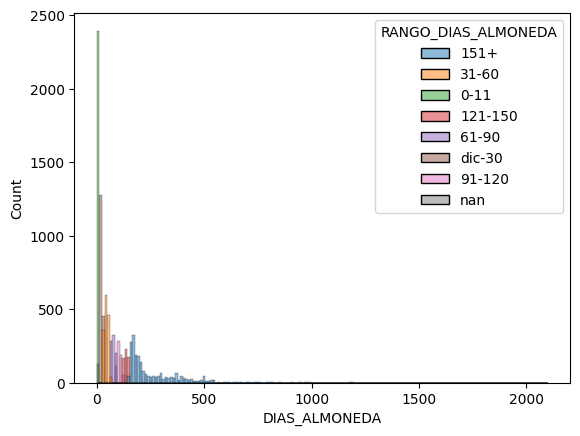

In [ ]:
sample_df = df.sample(10000, random_state=42)                                    # Muestra aleatoria de 10,000 registros
sns.histplot(sample_df, x='DIAS_ALMONEDA', hue='RANGO_DIAS_ALMONEDA')

Podemos visualizar que el rango de la variable objetivo no tiene una distribución normal, y efectivamente gran parte de las observaciones se encuentra en un rango de más de 151 días, lo que nos demuestra la lenta rotación de artículos.

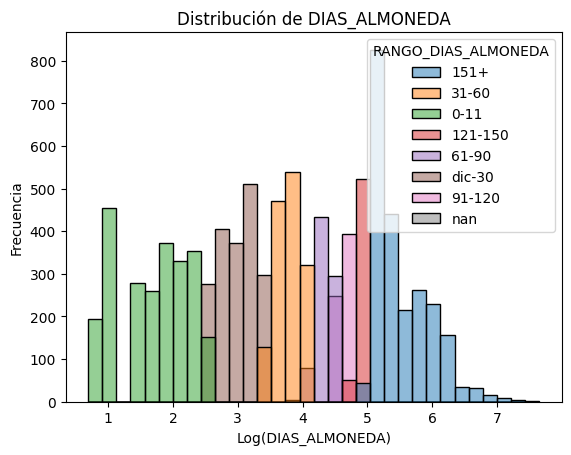

In [ ]:
sample_df = sample_df[sample_df['DIAS_ALMONEDA'] >=0]                            # Filtrar solo los valores positivos
sample_df = sample_df.dropna(subset=['DIAS_ALMONEDA'])                           # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'

sample_df['DIAS_ALMONEDA_LOG'] = np.log1p(sample_df['DIAS_ALMONEDA'])            # Aplicar logaritmo a la columna 'DIAS_ALMONEDA'
sns.histplot(sample_df, x='DIAS_ALMONEDA_LOG', hue='RANGO_DIAS_ALMONEDA')
plt.xlabel('Log(DIAS_ALMONEDA)')                                                  # Etiqueta del eje x
plt.ylabel('Frecuencia')                                                          # Etiqueta del eje y
plt.title('Distribución de DIAS_ALMONEDA')                                        # Título del gráfico
plt.show()

**Justificación del uso de transformación logarítmica en DIAS_ALMONEDA**

La variable DIAS_ALMONEDA representa el número de días que un artículo ha permanecido en inventario, y presenta una distribución altamente sesgada a la derecha, donde la mayoria de los valores se concentran cerca de cero y existen valores extremos mucho mayores. Para abordar el sesgo se aplicó una transformacion logarítmica que reduce el impacto de valores extremos, viendo que la distribución sea más simétrica y adecuada para el modelo.

In [ ]:
#df = df[df['DIAS_ALMONEDA'] >= 0]                                                 # Filtrar solo los valores positivos
#df = df.dropna(subset=['DIAS_ALMONEDA'])                                          # Eliminar filas con valores faltantes en 'DIAS_ALMONEDA'
#df['DIAS_ALMONEDA_LOG'] = np.log1p(df['DIAS_ALMONEDA'])                           # Aplicar transformacion logaritmica al DF procesado


A continuación vamos a revisar las distribuciones de nuestras variables numéricas para revisar si aplica el escalamiento y transformación

In [ ]:
num_var_list = ['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS']


In [ ]:
num_var_list_2 = ['INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']

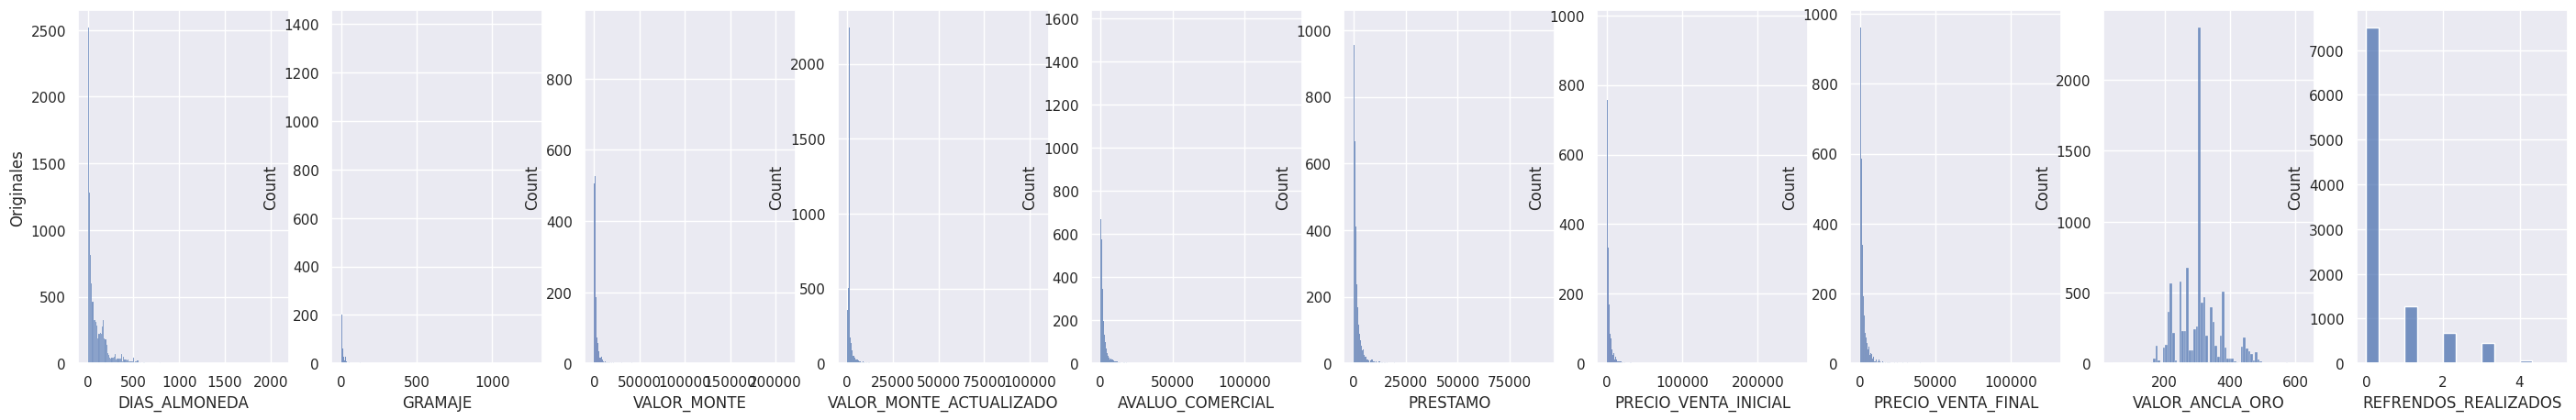

In [ ]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf0 = sample_df[num_var_list[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

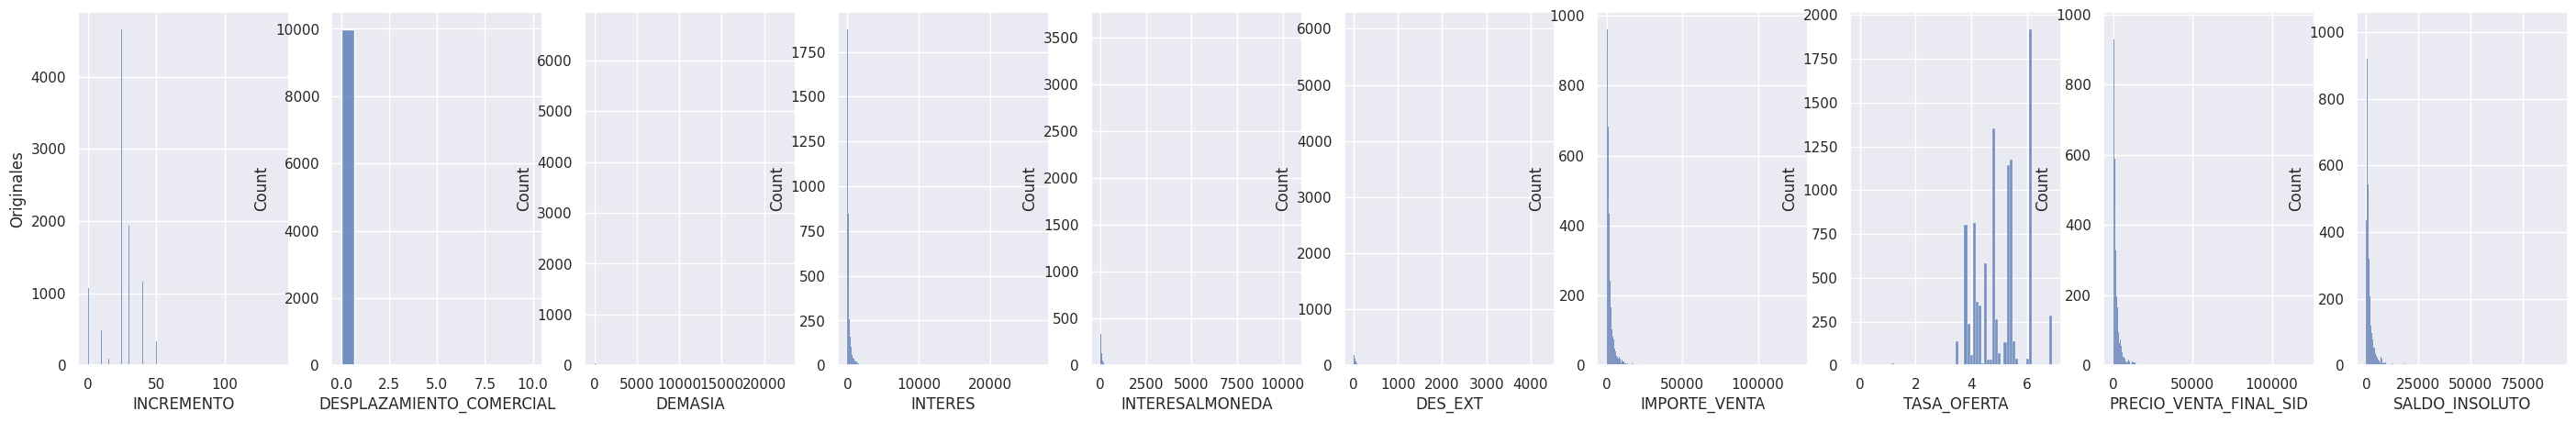

In [ ]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf0 = sample_df[num_var_list_2[k]]
  sns.histplot(Transf0)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Originales')

plt.show()

Interpretación: Podemos observar que prácticamente todas las variables numéricas cuentan con un sesgo a la izquierda, por lo que primero vamos a aplicar es una transformación  *Yeo-Johnson*,que se puede utilizar en variables con valores cero y negativos, así como valores positivos. Posteriormente aplicaremos un escalamiento Min-Max.

In [ ]:
df_1 = df.copy()
transformer = PowerTransformer(method="yeo-johnson")
transformer.fit(df_1[['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])
transf = transformer.transform(df_1[['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])

In [ ]:
transf_df = pd.DataFrame(transf)
transf_df.columns = ['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']
transf_df

,DIAS_ALMONEDA,GRAMAJE,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,VALOR_ANCLA_ORO,REFRENDOS_REALIZADOS,INCREMENTO,DESPLAZAMIENTO_COMERCIAL,DEMASIA,INTERES,INTERESALMONEDA,DES_EXT,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,-0.275506,0.112966,-3.512577,-0.023542,-0.074190,0.298810,-0.093272,0.303541,0.085473,-0.573342,0.190203,-0.036407,1.566910,-1.753041,0.185185,-0.813211,0.305842,-1.807014,0.078909,0.299259
1,-0.275506,-0.033153,-3.512577,-0.023542,-0.074190,-0.176302,-0.607500,0.019726,0.085473,-0.573342,0.190203,-0.036407,1.584149,-1.753041,0.185185,-0.813211,0.021765,-1.807014,-0.391987,-0.176031
2,-0.275506,-0.033153,-3.512577,-0.023542,-0.074190,0.470374,0.084878,0.495719,0.085473,-0.573342,0.190203,-0.036407,1.588855,-1.753041,0.185185,-0.813211,0.497970,-1.807014,0.249564,0.470854
3,-0.316010,1.593710,-3.512577,-0.023542,-3.807988,-4.583637,1.345075,1.513663,0.085473,-0.573342,0.428410,-0.036407,1.698371,-1.753041,-1.237044,-0.813211,1.512517,-0.112188,-4.629859,-4.591947
4,-0.503825,1.159381,-3.512577,-0.023542,-3.807988,-4.583637,0.108274,0.279152,0.085473,-0.573342,-0.805263,-0.036407,1.652765,-1.753041,-1.241968,-0.813211,0.281447,-0.112188,-4.629859,-4.591947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,-0.381068,0.028106,0.126076,0.243088,0.231025,0.269136,0.156967,0.327234,-0.444560,1.812555,1.177226,-0.036407,-0.724554,0.569012,1.067352,1.228658,0.329539,0.364351,0.319776,0.269577
1048544,1.635474,-0.462295,-0.060650,-0.283933,0.024070,-0.104723,-0.053993,0.038414,-0.049881,-0.573342,0.428410,-0.036407,-0.724554,0.308710,-1.249442,-0.813211,0.040482,0.465494,0.038428,-0.104417
1048545,0.618696,-0.511712,-0.289923,-0.423883,-0.229632,-0.190505,-0.326640,-0.230555,-0.741317,1.665453,0.834727,-0.036407,-0.724554,0.213492,-1.249442,-0.813211,-0.229076,-0.451288,-0.215249,-0.190241
1048546,-1.108093,-0.033153,1.046455,-0.023542,-0.074190,0.823978,0.885921,0.906972,0.085473,1.812555,0.190203,-0.036407,1.491592,1.001509,1.078439,1.484623,0.908491,-0.112188,0.868294,0.824471


In [ ]:
minmax_scale = preprocessing.MinMaxScaler().fit(transf_df[['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])
minmax= minmax_scale.transform(transf_df[['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']])

In [ ]:
minmax_df = pd.DataFrame(minmax)
minmax_df.columns=['DIAS_ALMONEDA','GRAMAJE','VALOR_MONTE','VALOR_MONTE_ACTUALIZADO','AVALUO_COMERCIAL','PRESTAMO', 'PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','VALOR_ANCLA_ORO',
                'REFRENDOS_REALIZADOS','INCREMENTO','DESPLAZAMIENTO_COMERCIAL','DEMASIA','INTERES','INTERESALMONEDA','DES_EXT','IMPORTE_VENTA','TASA_OFERTA','PRECIO_VENTA_FINAL_SID',
                'SALDO_INSOLUTO']
minmax_df

,DIAS_ALMONEDA,GRAMAJE,VALOR_MONTE,VALOR_MONTE_ACTUALIZADO,AVALUO_COMERCIAL,PRESTAMO,PRECIO_VENTA_INICIAL,PRECIO_VENTA_FINAL,VALOR_ANCLA_ORO,REFRENDOS_REALIZADOS,INCREMENTO,DESPLAZAMIENTO_COMERCIAL,DEMASIA,INTERES,INTERESALMONEDA,DES_EXT,IMPORTE_VENTA,TASA_OFERTA,PRECIO_VENTA_FINAL_SID,SALDO_INSOLUTO
0,0.760825,0.559595,0.000000,0.629372,0.253563,0.465430,0.597813,0.588044,0.514901,0.000000,0.019834,0.0,0.931019,0.000000,0.261773,0.001856,0.617702,0.141763,0.445945,0.463227
1,0.760825,0.535296,0.000000,0.629372,0.253563,0.422179,0.558957,0.565969,0.514901,0.000000,0.019834,0.0,0.938024,0.000000,0.261773,0.001856,0.593410,0.141763,0.403291,0.419726
2,0.760825,0.535296,0.000000,0.629372,0.253563,0.481048,0.611274,0.602992,0.514901,0.000000,0.019834,0.0,0.939936,0.000000,0.261773,0.001856,0.634131,0.141763,0.461404,0.478932
3,0.760149,0.805840,0.000000,0.629372,0.000000,0.020968,0.706498,0.682170,0.514901,0.000000,0.021580,0.0,0.984432,0.000000,0.002262,0.001856,0.720887,0.165903,0.019416,0.015560
4,0.757018,0.733612,0.000000,0.629372,0.000000,0.020968,0.613042,0.586147,0.514901,0.000000,0.012539,0.0,0.965902,0.000000,0.001364,0.001856,0.615616,0.165903,0.019416,0.015560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048543,0.759065,0.545483,0.266519,0.645594,0.274290,0.462729,0.616721,0.589887,0.505984,0.982400,0.027067,0.0,0.000000,0.216875,0.422741,0.759430,0.619729,0.172691,0.467764,0.460510
1048544,0.792690,0.463930,0.252842,0.613529,0.260236,0.428695,0.600781,0.567422,0.512624,0.000000,0.021580,0.0,0.000000,0.192563,0.000000,0.001856,0.595011,0.174131,0.442278,0.426281
1048545,0.775735,0.455712,0.236049,0.605014,0.243007,0.420886,0.580179,0.546501,0.500992,0.921831,0.024557,0.0,0.000000,0.183670,0.000000,0.001856,0.571960,0.161073,0.419300,0.418426
1048546,0.746942,0.535296,0.333934,0.629372,0.253563,0.513237,0.671803,0.634980,0.514901,0.982400,0.019834,0.0,0.900418,0.257269,0.424764,0.854398,0.669236,0.165903,0.517449,0.511297


In [ ]:
minmax_df_sample = minmax_df.sample(10000, random_state=42)

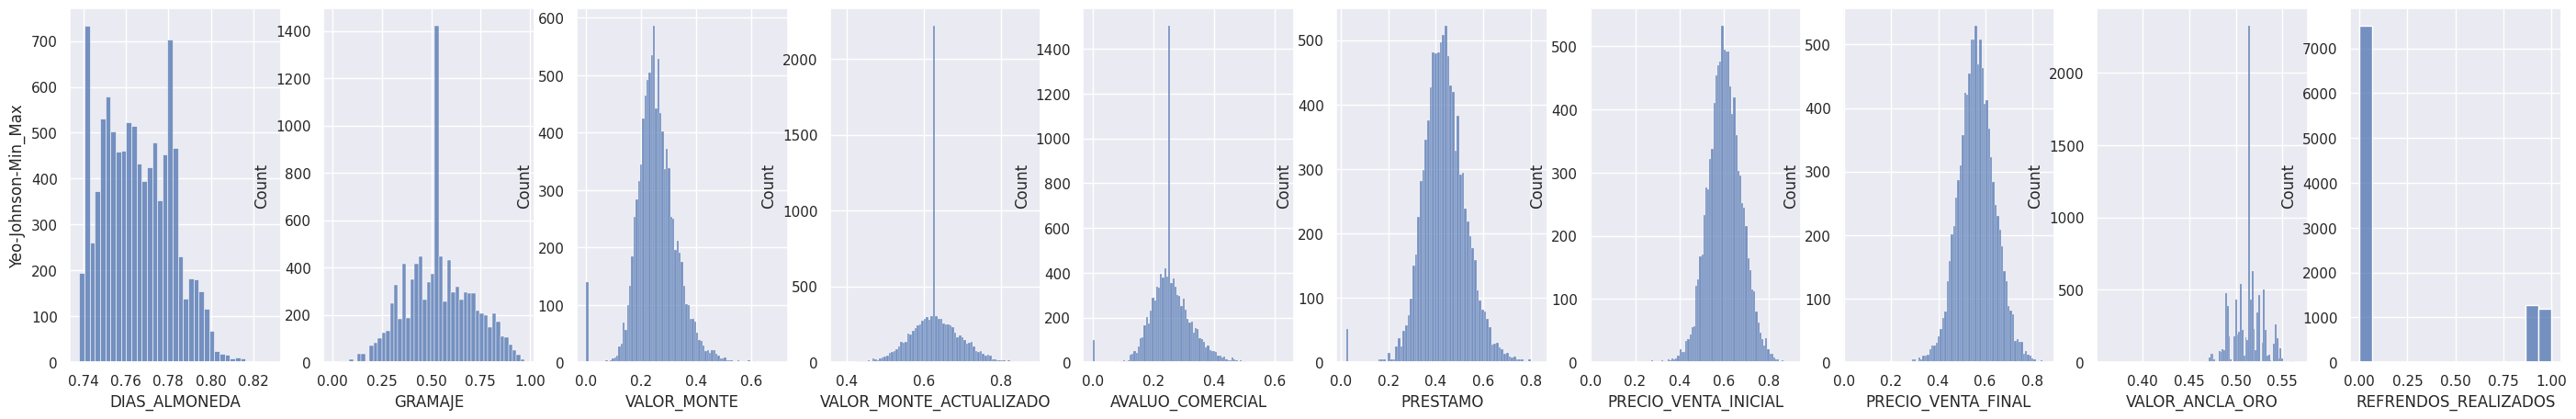

In [ ]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf2 = minmax_df_sample[num_var_list[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

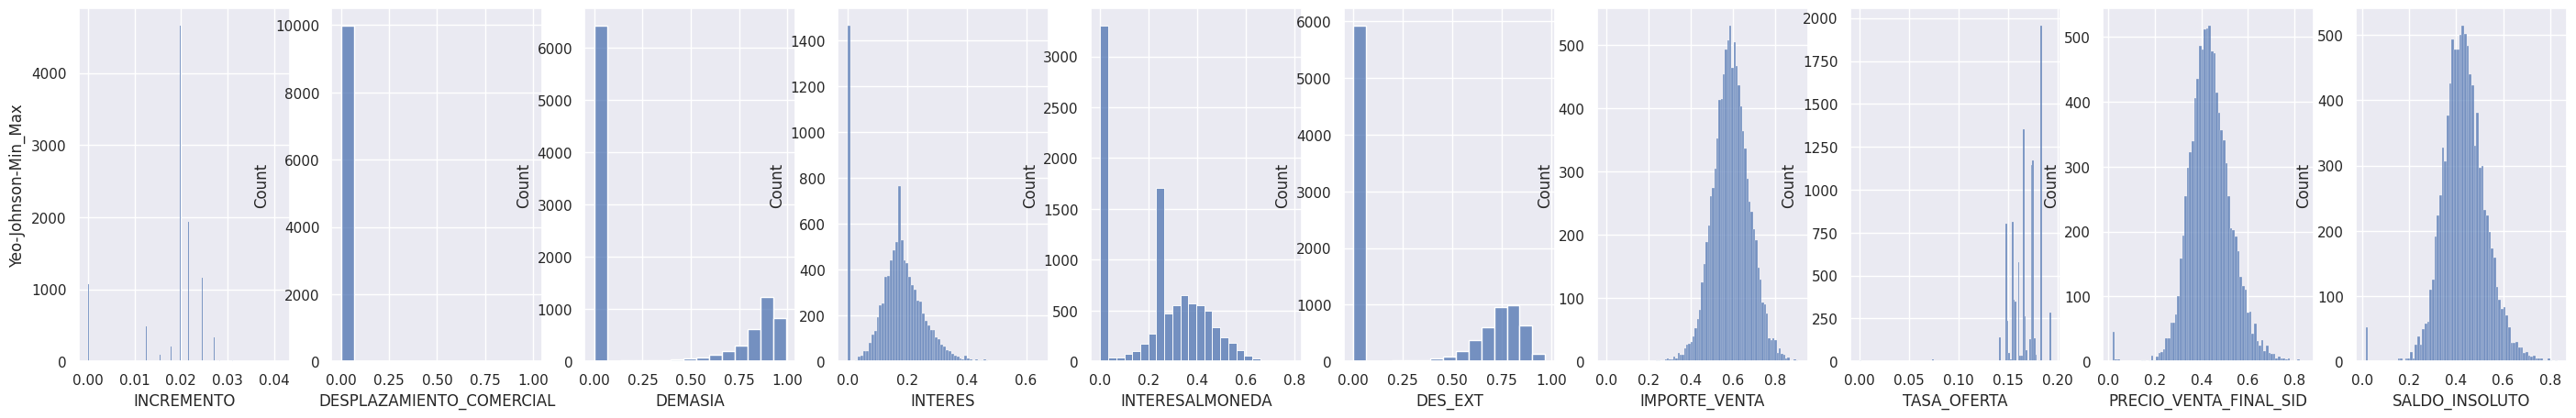

In [ ]:
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,10)
for k in range(0,10):
# Datos originales
  plt.subplot(1,10, k+1)

  Transf2 = minmax_df_sample[num_var_list_2[k]]
  sns.histplot(Transf2)
  plt.xlabel(num_var_list_2[k])
  if k == 0:
    plt.ylabel('Yeo-Johnson-Min_Max')

plt.show()

Podemos observar que las distribuciones de las variables numéricas considerando nuestra variable target, son prácticamente normales mayormente.

#**Transformación de variables categóricas**

Antes de iniciar con la transformación de variables categóricas, es importante separar en dos listas las variables con alta cardinalidad y las variables con baja cardinalidad. Vamos a empezar con las de baja cardinalidad

In [ ]:
r = df.describe(include=object).T
moda = r['top'].dtype

In [ ]:
few_cardinal = r[r['unique'] <= 100].index
few_cardinal_variables = df[few_cardinal]
few_cardinal_variables

,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,ORIGEN,KILATAJE,FACTOR_HECHURA,FACTOR,RAMO,SUBRAMO,PRODUCTO,CANAL,RANGO_DIAS_ALMONEDA,TIPO_PRENDA
0,CIUDAD DE MÃXICO,VP,Venta al Publico,SIVA,14,Abollado Ligero / Funcional,F3,ALHAJAS,Alhajas,CL,Aprovechamiento Institucion,31-60,ANILLO
1,CIUDAD DE MÃXICO,VP,Venta al Publico,MIDAS,nan,nan,nan,ALHAJAS,Diamantes,CL,Aprovechamiento Institucion,31-60,ANILLO
2,CIUDAD DE MÃXICO,VP,Venta al Publico,MIDAS,nan,nan,nan,ALHAJAS,Diamantes,CL,Aprovechamiento Institucion,31-60,CHURUMBELA
3,AGUASCALIENTES,VP,Venta al Publico,SIVA,10,Buen Estado Sin Personalizar / Sin Abollar,F4,ALHAJAS,Alhajas,CL,Anticipado Ventanilla,dic-30,COLLAR
4,CIUDAD DE MÃXICO,VP,Venta al Publico,SIVA,8,Personalizado,F2,ALHAJAS,Alhajas,CL,Anticipado Ventanilla,dic-30,OTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,YUCATÃN,VP,Venta al Publico,SIVA,10,Buen Estado Sin Personalizar / Sin Abollar,F4,ALHAJAS,Alhajas,CL,Cumplido,dic-30,PULSERA
1048571,PUEBLA,VP,Venta al Publico,SIVA,14,Buen Estado Sin Personalizar / Sin Abollar,F4,ALHAJAS,Alhajas,CL,Cumplido,151+,ANILLO
1048572,GUERRERO,VP,Venta al Publico,SIVA,10,Buen Estado Sin Personalizar / Sin Abollar,F4,ALHAJAS,Alhajas,CL,Cumplido,91-120,ANILLO
1048573,QUINTANA ROO,VP,Venta al Publico,MIDAS,nan,nan,nan,ALHAJAS,Diamantes,CL,Cumplido,0-11,BROQUEL


Vamos a visualizar, en gráficos de barra la frecuencia de las categorías de las variables con baja cardinalidad

<ipython-input-43-84a230fe6a4e>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
<ipython-input-43-84a230fe6a4e>:26: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.97])
<ipython-input-43-84a230fe6a4e>:26: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.97])
<ipython-input-43-84a230fe6a4e>:26: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.97])
<ipython-input-43-84a230fe6a4e>:26: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.97])
<ipython-input-43-84a230fe6a4e>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xtic

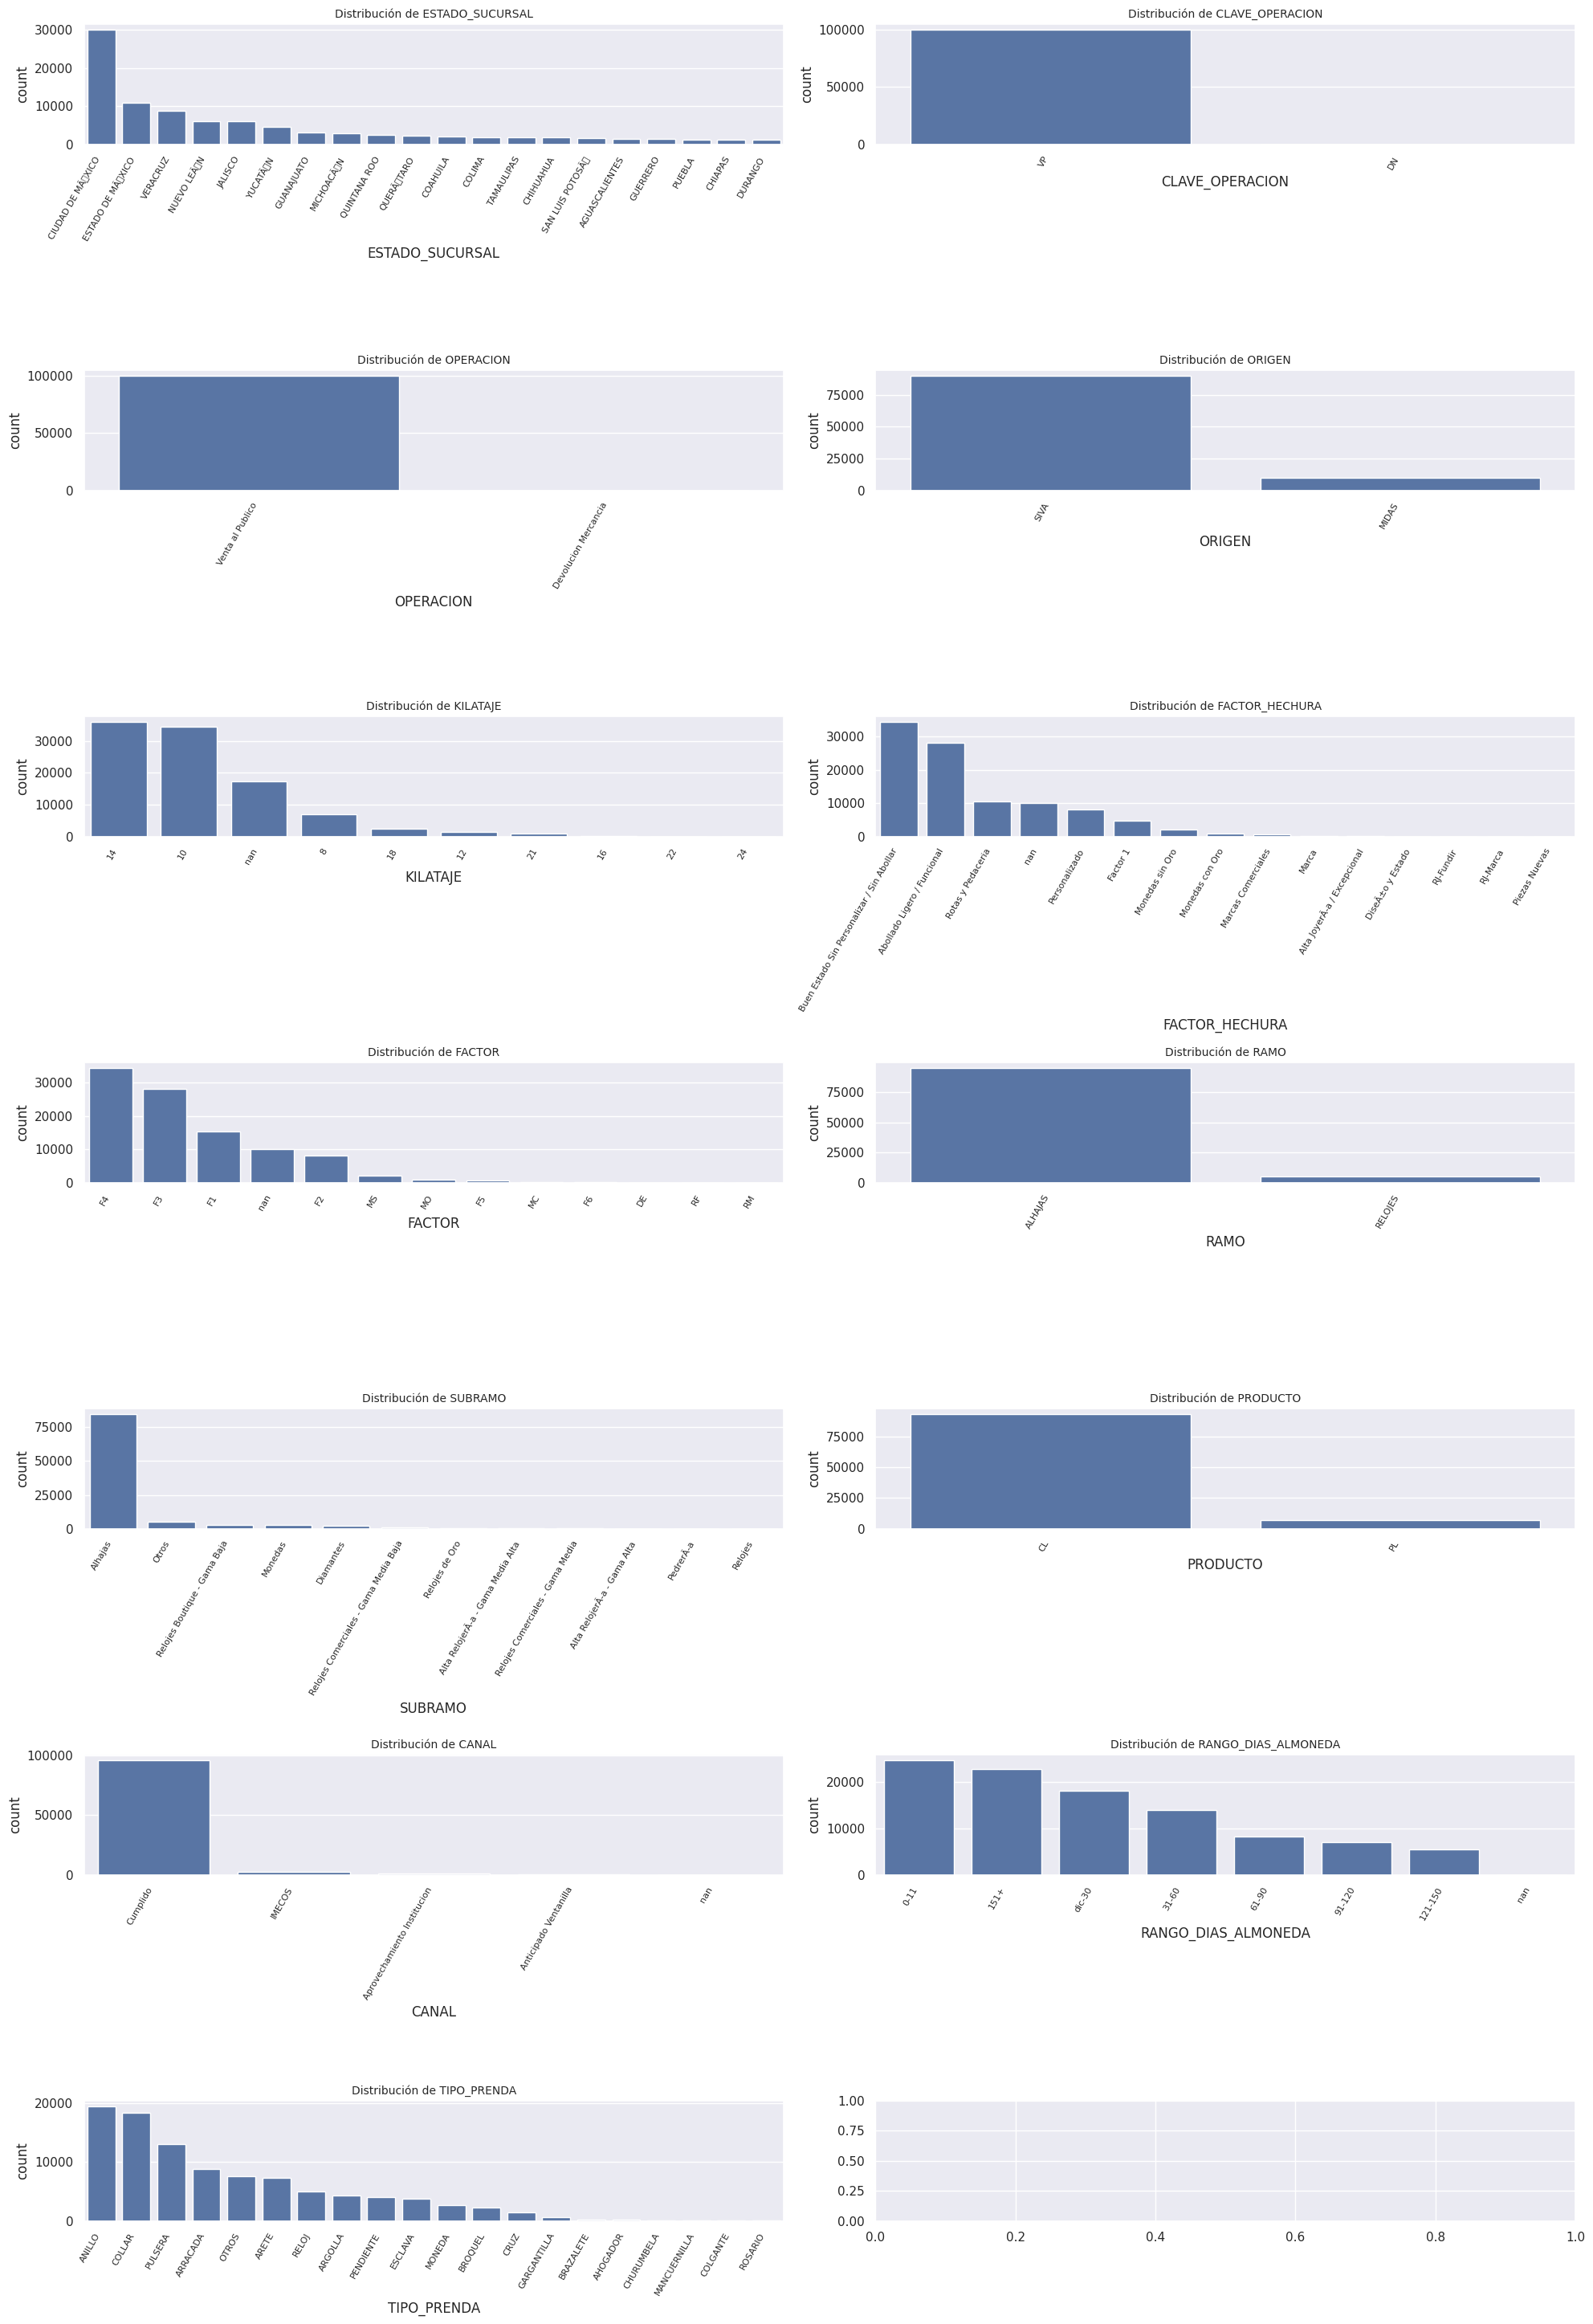

In [ ]:
sample_df_2 = few_cardinal_variables.sample(100000, random_state=42)

# Create subplots
fig, axis = plt.subplots(7, 2, figsize=(20, 30))

# Define the variables to plot
variables = ['ESTADO_SUCURSAL','CLAVE_OPERACION',
             'OPERACION', 'ORIGEN','KILATAJE',
             'FACTOR_HECHURA', 'FACTOR','RAMO',
             'SUBRAMO', 'PRODUCTO', 'CANAL',
             'RANGO_DIAS_ALMONEDA', 'TIPO_PRENDA']


for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axis[row, col]


    top_categories = sample_df_2[var].value_counts().nlargest(20).index
    filtered_data = sample_df_2[sample_df_2[var].isin(top_categories)]

    plot = sns.countplot(x=var, data=filtered_data, ax=ax, order=top_categories)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60, ha='right', fontsize=8)
    ax.set_title(f'Distribución de {var}', fontsize=10)
    plt.tight_layout(rect=[0,0,1,0.97])

plt.show()



Posteriormente vamos a aplicar la codificación *one hot a las variables de baja cardinalidad. Consideremos que esta codificación agrega más columnas al dataset por cada valor único. En nuestro caso tenemos más variables con baja cardinalidad que alta cardinalidad

In [ ]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_data = encoder.fit_transform(few_cardinal_variables)

In [ ]:
onehot_df = pd.DataFrame(encoded_data)
onehot_df.columns = encoder.get_feature_names_out()
onehot_df

,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,ESTADO_SUCURSAL_CIUDAD DE MÃXICO,ESTADO_SUCURSAL_COAHUILA,ESTADO_SUCURSAL_COLIMA,ESTADO_SUCURSAL_DURANGO,ESTADO_SUCURSAL_ESTADO DE MÃXICO,...,TIPO_PRENDA_MONEDA,TIPO_PRENDA_OTROS,TIPO_PRENDA_PANTALLA,TIPO_PRENDA_PENDIENTE,TIPO_PRENDA_PLUMA,TIPO_PRENDA_PULSERA,TIPO_PRENDA_RELOJ,TIPO_PRENDA_ROSARIO,TIPO_PRENDA_TELÃ©FONO,TIPO_PRENDA_VIOLADOR
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1047935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Posteriormente vamos a aplicar codificación binaria a las variables con alta cardinalidad, la transformación será BinaryEncoder para que el modelo se más eficiente para evaluar los datos y distribuciones de las variables

In [ ]:
high_cardinal = r[r['unique'] > 100].index
highly_cardinal_variables = df[high_cardinal]
highly_cardinal_variables

,SUCURSAL,PARTIDA,DESCRIPCION_PARTIDA,VALUADOR
0,1005,181615421,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,0
1,1005,181616741,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,0
2,1005,181616743,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,0
3,16,181662772,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,1200444
4,278,181809632,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,2010538
...,...,...,...,...
1048570,28,175183815,1 PULSERA TIPO:ESLABON DISEÃO:LAMINADO DE ORO...,1984026
1048571,229,175186666,1 ANILLO TIPO:DAMA DISEÃO:CON SINTETICO DE OR...,2001188
1048572,64,175200563,1 ANILLO TIPO:DAMA DISEÃO:CON SINTETICO DE OR...,1500150
1048573,204,175201651,1 PAR BROQUELES ORO AMARILLO 14K PESO 6.00 GR...,2010170


In [ ]:
encoder = BinaryEncoder()
encoded_data= encoder.fit_transform(highly_cardinal_variables)

In [ ]:
binary_df = pd.DataFrame(encoded_data)
binary_df.columns = encoder.get_feature_names_out()
binary_df

,SUCURSAL_0,SUCURSAL_1,SUCURSAL_2,SUCURSAL_3,SUCURSAL_4,SUCURSAL_5,SUCURSAL_6,SUCURSAL_7,SUCURSAL_8,PARTIDA_0,...,VALUADOR_0,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,1,1,0,0,0,0,1,1,1,...,0,0,1,1,1,0,0,1,0,1
1048571,1,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,1,1,0,1,0
1048572,0,1,0,1,0,0,0,1,1,1,...,0,0,1,1,1,0,0,0,1,0
1048573,1,0,0,1,0,0,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1


#**Aplicación de PCA a variables numéricas**

La aplicación de Principal Component Analysis, considte en reducir la dimensionalidad de un dataset para mejorar la eficiencia de un modelo de machine learning como el que estaremos aplicando al problema, es importante mencionar que previo a aplicar el método de PCA, se requiere escalar las variables numércias, ya que la varianza es sensible a la magnitud de los datos, etapa que ya se realizó anteriormente. Se requiere que mayormente la media sea cero y su varianza de 1

In [ ]:
pca = PCA()
minmax_df_projected = pca.fit_transform(minmax_df)
minmax_df_projected = pd.DataFrame(minmax_df_projected)
minmax_df_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.263387,-0.234478,-0.129171,0.576532,-0.310339,0.181428,-0.077540,0.098193,-0.038747,0.000128,-0.173005,0.004894,-0.005774,-0.008445,-0.008649,0.012497,-0.003816,-0.000108,-0.000055,0.000361
1,0.264749,-0.238003,-0.206328,0.567677,-0.300926,0.203441,-0.054421,0.074331,-0.014703,0.011194,-0.164544,0.002821,-0.014356,-0.011226,-0.005504,-0.001281,-0.002116,-0.004995,-0.001276,0.001001
2,0.270865,-0.233100,-0.114540,0.578784,-0.337705,0.153219,-0.086785,0.106151,-0.046472,0.004549,-0.176534,0.006965,-0.004591,-0.010551,-0.009325,0.013182,-0.003753,0.000856,-0.000004,0.000263
3,0.239036,-0.249430,-0.463301,0.785787,0.098327,0.393356,0.096768,0.094050,-0.180163,0.520100,0.150694,-0.093987,-0.034716,0.025593,-0.025674,-0.017108,0.005883,-0.012221,-0.003731,-0.000009
4,0.217498,-0.254219,-0.576564,0.740449,0.095749,0.389749,0.110819,0.058874,-0.127094,0.410926,0.123759,-0.050389,-0.030914,0.007563,-0.016593,-0.015087,-0.002643,-0.010510,-0.003695,0.000250


Vamos a visualizar la curva de porcentaje de varianza acumulada y determinar el número mínimo de componentes principales que expliqu más del 90% de varianza

In [ ]:
total_components =minmax_df_projected.shape[1]

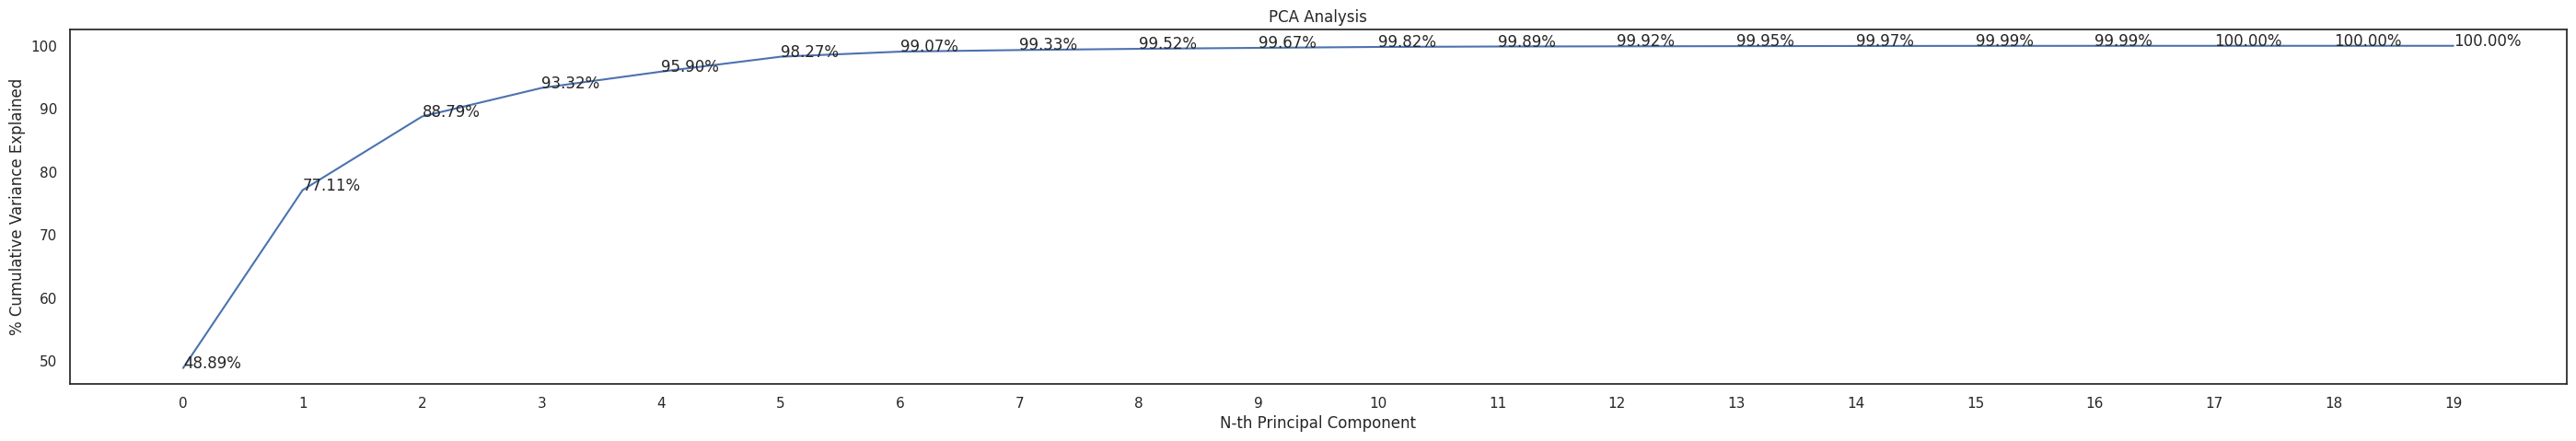

In [ ]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
#ax = plt.axes()
#ax.xaxis.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.2f'))+'%')

Podemos observar el porcentaje de varianza que se explica por cada componente principal. En nuestro caso el componente principal #5 explica más del 98% de varianza de los datos y es el que vamos a ocupar

In [ ]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.2f'),'%')

The percentage of variance explained by principal component 1 is 48.89 %
The percentage of variance explained by principal component 2 is 28.22 %
The percentage of variance explained by principal component 3 is 11.68 %
The percentage of variance explained by principal component 4 is 4.52 %
The percentage of variance explained by principal component 5 is 2.58 %
The percentage of variance explained by principal component 6 is 2.37 %
The percentage of variance explained by principal component 7 is 0.81 %
The percentage of variance explained by principal component 8 is 0.25 %
The percentage of variance explained by principal component 9 is 0.19 %
The percentage of variance explained by principal component 10 is 0.15 %
The percentage of variance explained by principal component 11 is 0.15 %
The percentage of variance explained by principal component 12 is 0.07 %
The percentage of variance explained by principal component 13 is 0.03 %
The percentage of variance explained by principal compone

Importante, antes de concatenar el nuevo dataframe con las variables transformadas, escaladas y analizadas con PCA, vamos a separar la variable de salida (DIAS_ALMONEDA) sin las transformaciones y escalamiento, ya que es importante por temas de interpretabilidad conservar la variable en sus unidades originales que son días

In [ ]:
y= df['DIAS_ALMONEDA']

#**Conjuntar en un dataframe con transformaciones, escalamiento y PCA**

In [ ]:
n = 5
#Vamos a seleccionar únicamente los primeros n componentes del PCA y los almacenamos en un nuevo dataframe
new_data = minmax_df_projected[[0,1,2,3,4]]
#Se renombran las columnas del dataframe con los nombres de los componentes principales
new_data.columns = ['PC{}'.format(i) for i in range(1,n+1)]

#Se concatena el dataframe de componentes principales, dataframe codificado one-hot, las variables binarias (categóricas) y la variable objetivo y

new_data = pd.concat([new_data,onehot_df,binary_df,y],axis=1)

In [ ]:
new_data

,PC1,PC2,PC3,PC4,PC5,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,...,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9,DIAS_ALMONEDA
0,0.263387,-0.234478,-0.129171,0.576532,-0.310339,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
1,0.264749,-0.238003,-0.206328,0.567677,-0.300926,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
2,0.270865,-0.233100,-0.114540,0.578784,-0.337705,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0
3,0.239036,-0.249430,-0.463301,0.785787,0.098327,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0
4,0.217498,-0.254219,-0.576564,0.740449,0.095749,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,26.0
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,347.0
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,111.0
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
